<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/Understanding_Hamiltonian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [ ]:
from qiskit.quantum_info import SparsePauliOp

H = SparsePauliOp.from_list([
    ("II",0.75),
    ("XX",-0.25),
    ("YY",0.25),
    ("ZZ",-0.25)
])

In [ ]:
print(H)

SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.75+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j])


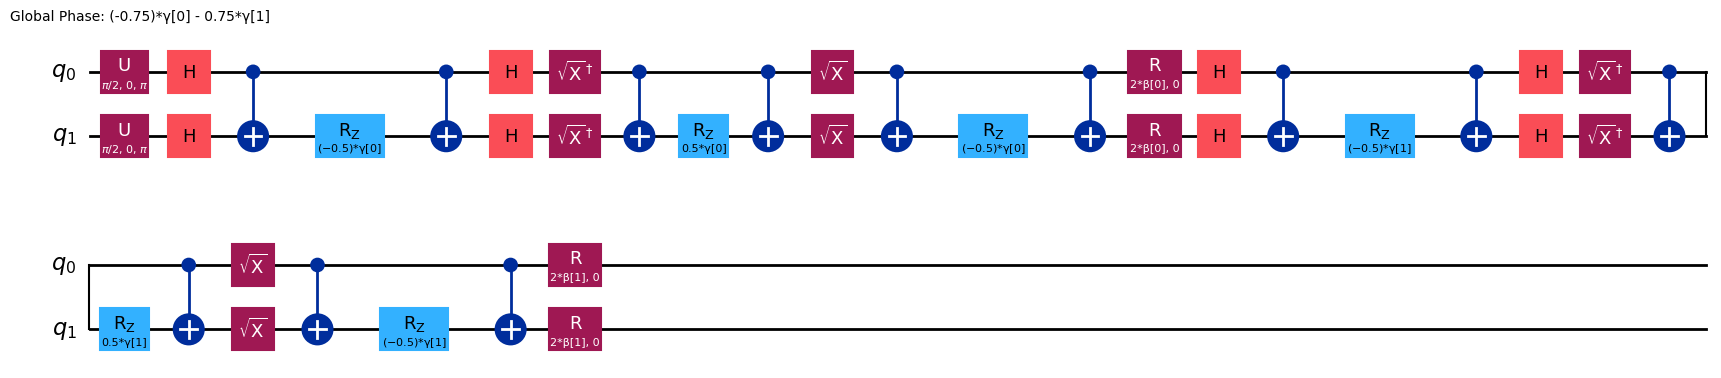

In [ ]:
from qiskit.circuit.library import QAOAAnsatz
ansatz = QAOAAnsatz(H,reps=2)
ansatz.decompose(reps=3).draw("mpl")

In [ ]:
from qiskit.primitives import StatevectorEstimator
import numpy as np

def cost_func(params,ansatz,H,estimator):
  pub = (ansatz,H,params)
  cost = estimator.run([pub]).result()[0].data.evs
  return cost

x = 2*np.pi*np.random.rand(ansatz.num_parameters)
estimator = StatevectorEstimator()
cost = cost_func(x,ansatz,H,estimator)
print(cost)

0.04221213392486489


In [ ]:
from scipy.optimize import minimize

res = minimize(
    lambda params: cost_func(params, ansatz, H, estimator),
    x0=x, method="COBYLA"
)

print("Optimal energy:", res.fun)
print("Optimal parameters:", res.x)

Optimal energy: 1.8896169767801396e-08
Optimal parameters: [4.56812604 0.4205122  3.3466181  1.39852619]


In [ ]:
# Build the optimized circuit
opt_circ = ansatz.assign_parameters(res.x)

# Add measurement
opt_circ.measure_all()

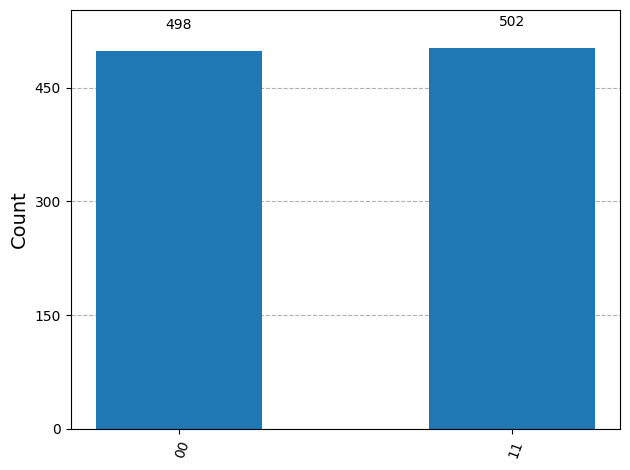

In [ ]:
# from qiskit_aer import AerSimulator
# from qiskit.visualization import plot_histogram

# sim = AerSimulator()
# counts = sim.run(opt_circ).result().get_counts()
# plot_histogram(counts)

from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Decompose the QAOAAnsatz into basis gates
opt_circ = ansatz.assign_parameters(res.x)
opt_circ.measure_all()

# Transpile for AerSimulator backend
sim = AerSimulator()
opt_circ_t = transpile(opt_circ, sim)

# Run the simulation
job = sim.run(opt_circ_t, shots=1000)
counts = job.result().get_counts()

plot_histogram(counts)
